# Data Preprocessing

## Import Data and Overview

In [140]:
import pandas as pd

full_data = pd.read_csv('data.csv')

In [141]:
pd.set_option('display.max_columns', 0)
full_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [142]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

## Data Cleaning

### Drop<br>Dummy columns: ['name', 'email', 'phone-number', 'credit_card']<br>Redundant columns: ['is_canceled', 'arrival_date_week_number']<br>Irrelevant Columns: ['reservation_status_date']<br>Majority Missing Values Columns: ['company']

In [143]:
clean_data = full_data.drop(['name', 'email', 'phone-number', 'credit_card', 'is_canceled', 'arrival_date_week_number', 'reservation_status_date', 'company'], axis=1)

### Check for NaN values

In [144]:
clean_data.isna().sum()

hotel                                 0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             488
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             16340
days_in_waiting_list                  0
customer_type                         0
adr                                   0


### Fill in missing values with probable/appropriate values

In [145]:
clean_data['children'].fillna(value=0, inplace=True)
clean_data['country'].fillna(value='COUNTRY_UNKNOWN', inplace=True)
clean_data['agent'].fillna(value=0, inplace=True)

In [146]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   lead_time                       119390 non-null  int64  
 2   arrival_date_year               119390 non-null  int64  
 3   arrival_date_month              119390 non-null  object 
 4   arrival_date_day_of_month       119390 non-null  int64  
 5   stays_in_weekend_nights         119390 non-null  int64  
 6   stays_in_week_nights            119390 non-null  int64  
 7   adults                          119390 non-null  int64  
 8   children                        119390 non-null  float64
 9   babies                          119390 non-null  int64  
 10  meal                            119390 non-null  object 
 11  country                         119390 non-null  object 
 12  market_segment  

## Data Transformation

### Make a copy

In [147]:
#data = clean_data.copy()
data = clean_data.sample(n=10000)
data.index = range(len(data))

### Convert month name to month number

In [148]:
month_map = {'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12,}
data.arrival_date_month = data.arrival_date_month.map(month_map)

### Convert other categorical variables into numeric variables and map it using a dataframe

In [149]:
cat_list = [column for column in data.columns if data[column].dtype == 'object']
cat_map = pd.DataFrame(columns=['variable', 'old_val', 'new_val'])

for cat in cat_list:
    cat_val = pd.Series(data[cat].unique())
    for _val in range(len(cat_val)):
        cat_dict = pd.Series({'variable' : cat, 'old_val' : cat_val[_val], 'new_val' : _val})
        cat_map = pd.concat([cat_map, cat_dict.to_frame().T], ignore_index=True)
        data[cat] = data[cat].replace(cat_val[_val], _val)
        
cat_map.set_index(['variable', 'new_val'], inplace=True)
cat_map.loc["hotel"]        

,old_val
new_val,
0,City Hotel
1,Resort Hotel


### Print Processed DataFrame

In [150]:
data.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,0,25,2017,3,12,1,0,2,0.0,0,0,0,0,0,0,0,0,0,0,0,0,9.0,0,0,88.0,0,1,0
1,0,34,2017,5,9,0,2,1,0.0,0,1,1,1,0,0,0,0,0,0,2,0,39.0,0,1,130.0,0,0,0
2,0,164,2015,10,2,0,2,1,0.0,0,1,2,2,0,0,0,0,0,0,0,0,19.0,0,1,100.0,0,0,1
3,0,7,2016,10,17,1,1,2,0.0,0,0,3,0,0,0,0,0,0,0,1,0,9.0,0,0,70.0,0,1,0
4,1,29,2016,8,26,1,2,1,0.0,0,1,4,0,0,0,0,0,1,1,0,0,240.0,0,0,221.0,0,0,0


## Scale Predictor Variables

In [151]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

X = data.drop(['reservation_status'], axis=1)
Y = data['reservation_status']

SS = StandardScaler()
X_std = SS.fit_transform(X)

MMS = MinMaxScaler()
X_mm = MMS.fit_transform(X)

# Data Visualization

In [152]:
import matplotlib.pyplot as plt
import seaborn as sns

## reservation_status(target variable) - Pie Chart

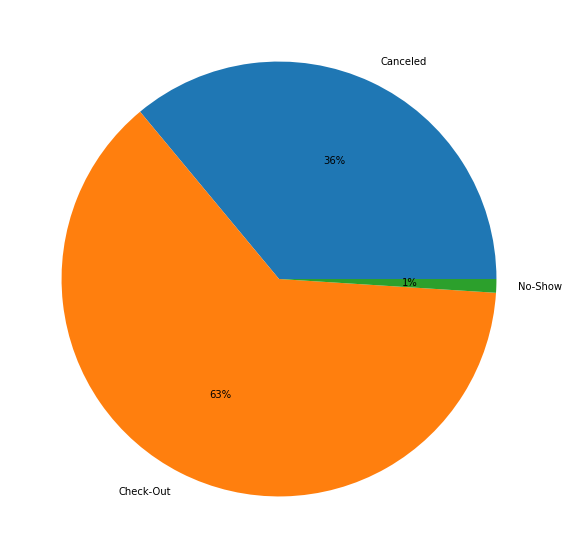

In [186]:
plt.figure(figsize=(10,10))
res_st_data = [sum(clean_data['reservation_status'] == 'Canceled'), sum(clean_data['reservation_status'] == 'Check-Out'), sum(clean_data['reservation_status'] == 'No-Show')]
res_label = ['Canceled', 'Check-Out', 'No-Show']
plt.pie(res_st_data, labels=res_label, autopct='%1.0f%%')
plt.show()

## 'reservation_status' per 'hotel'

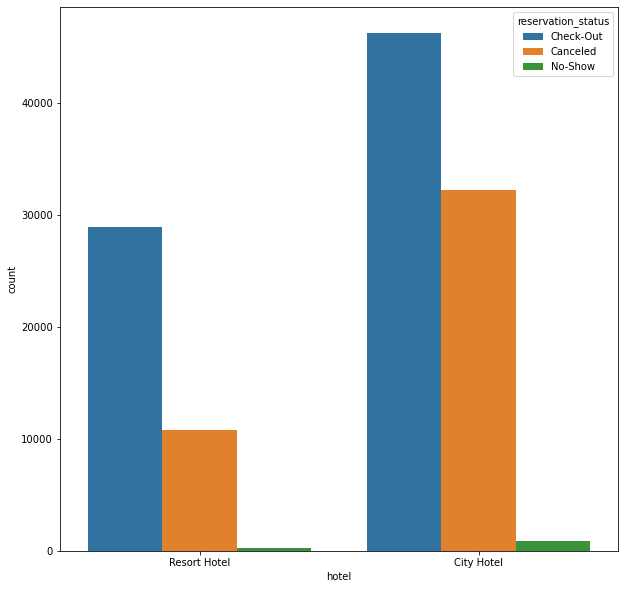

In [154]:
plt.figure(figsize=(10,10))
sns.countplot(x = clean_data['hotel'], hue=clean_data['reservation_status'])
plt.show()

## 'reservation_status' vs 'lead_time'

<Figure size 720x720 with 0 Axes>

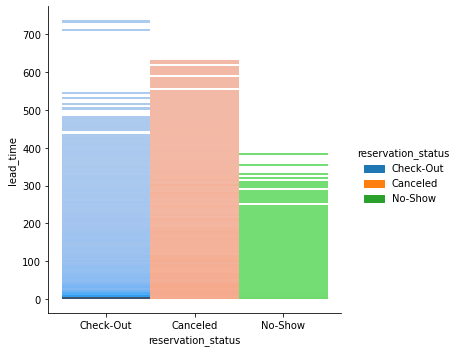

In [155]:
plt.figure(figsize=(10,10))
sns.displot(x = clean_data['reservation_status'], y = clean_data['lead_time'], hue=clean_data['reservation_status'])
plt.show()

## Top 10 'country' per 'reservation_status'

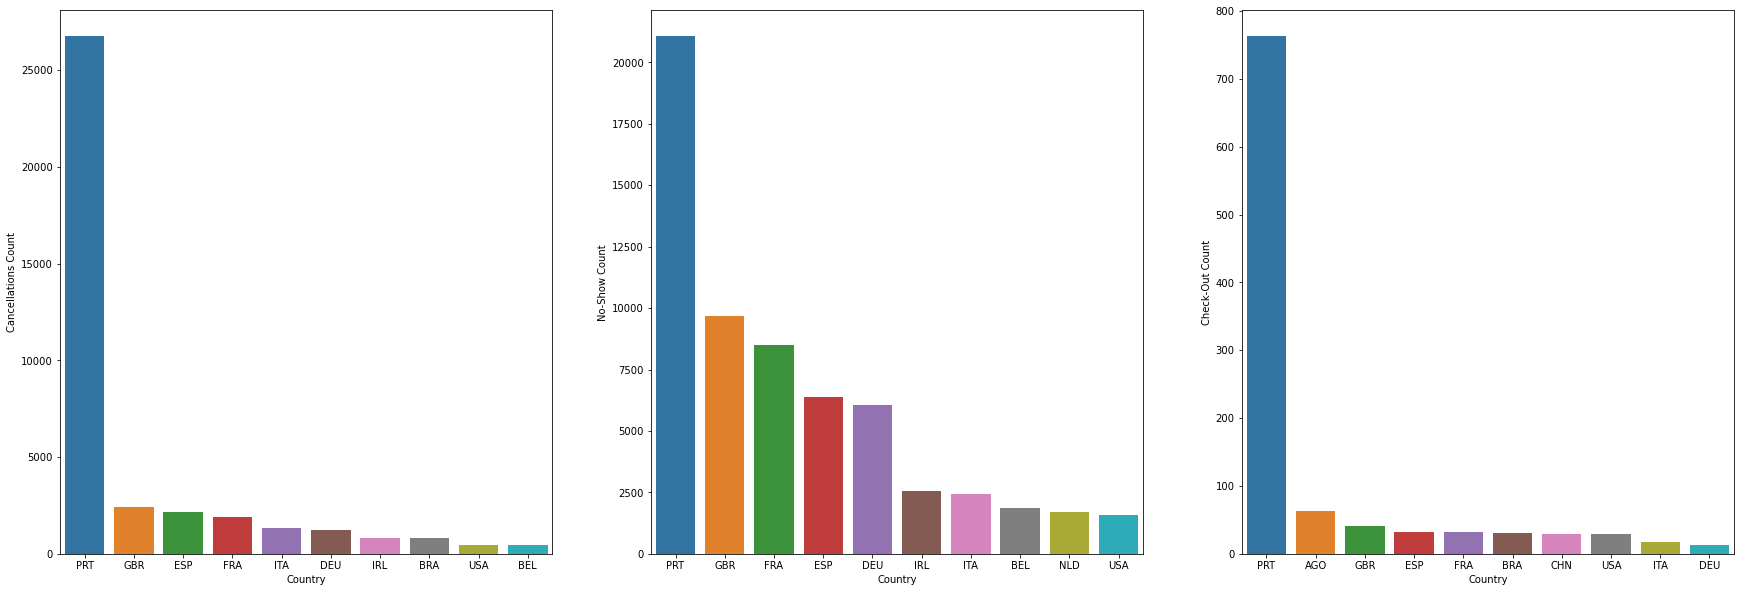

In [156]:
ctry_data = clean_data.groupby(by='reservation_status')['country'].value_counts()

fig, axes = plt.subplots(1,3, figsize=(30, 10))

can_plot = sns.barplot(ax=axes[0],x=ctry_data['Canceled'].head(10).index, y=ctry_data['Canceled'].head(10).values)
can_plot.set(xlabel='Country', ylabel='Cancellations Count')

ns_plot = sns.barplot(ax=axes[1],x=ctry_data['Check-Out'].head(10).index, y=ctry_data['Check-Out'].head(10).values)
ns_plot.set(xlabel='Country', ylabel='No-Show Count')

co_plot = sns.barplot(ax=axes[2],x=ctry_data['No-Show'].head(10).index, y=ctry_data['No-Show'].head(10).values)
co_plot.set(xlabel='Country', ylabel='Check-Out Count')

plt.show()

## 'reservation_status' per 'arrival_date_month'

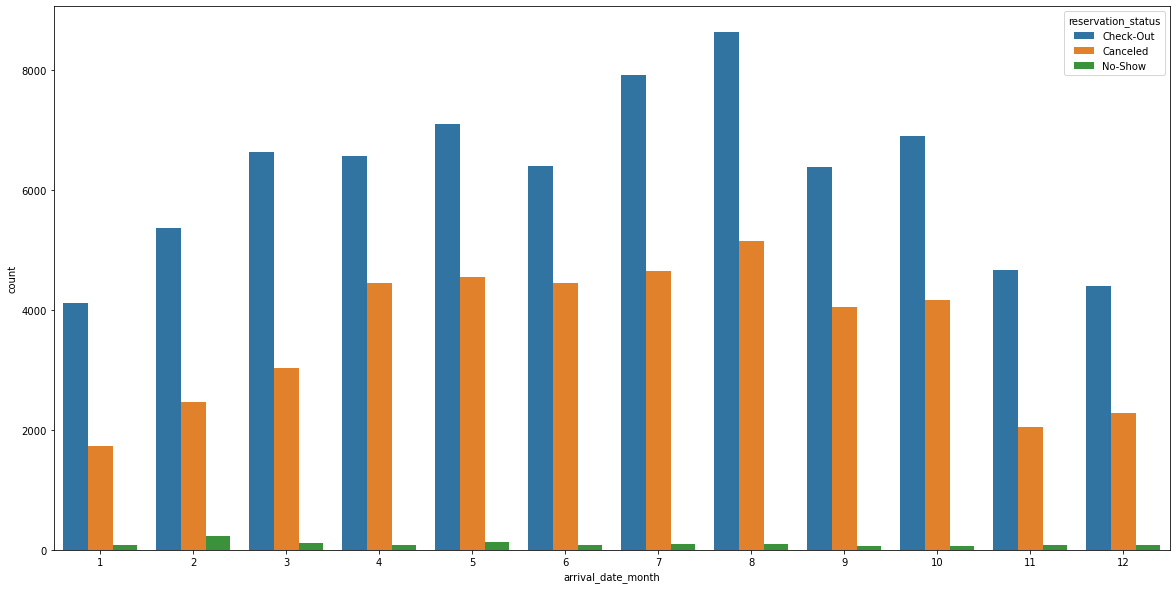

In [157]:
month_map = {'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12,}

plt.figure(figsize=(20,10))
sns.countplot(x=clean_data['arrival_date_month'].map(month_map), hue=clean_data['reservation_status'])
plt.show()

## 'reservation_status' per 'customer_type'

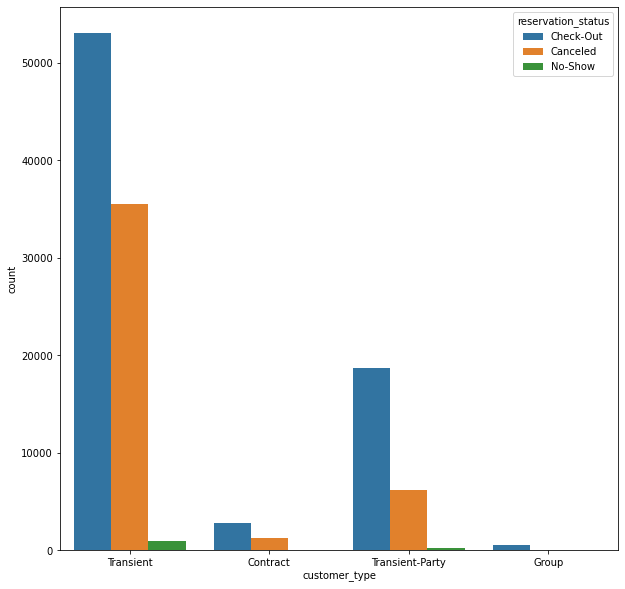

In [158]:
plt.figure(figsize=(10,10))
sns.countplot(x = clean_data['customer_type'], hue = clean_data['reservation_status'])
plt.show()

## 'reservation_status' per 'market_segment'

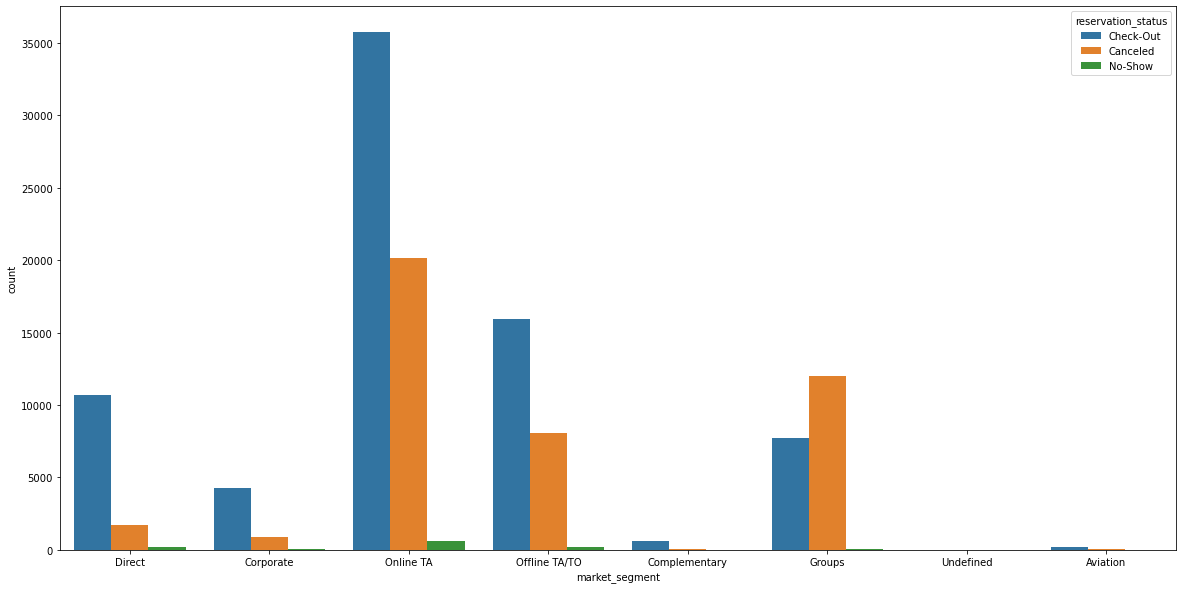

In [159]:
plt.figure(figsize=(20,10))
sns.countplot(x = clean_data['market_segment'], hue = clean_data['reservation_status'])
plt.show()

## 'reserved_room_obtained' per 'arrival_date_month'

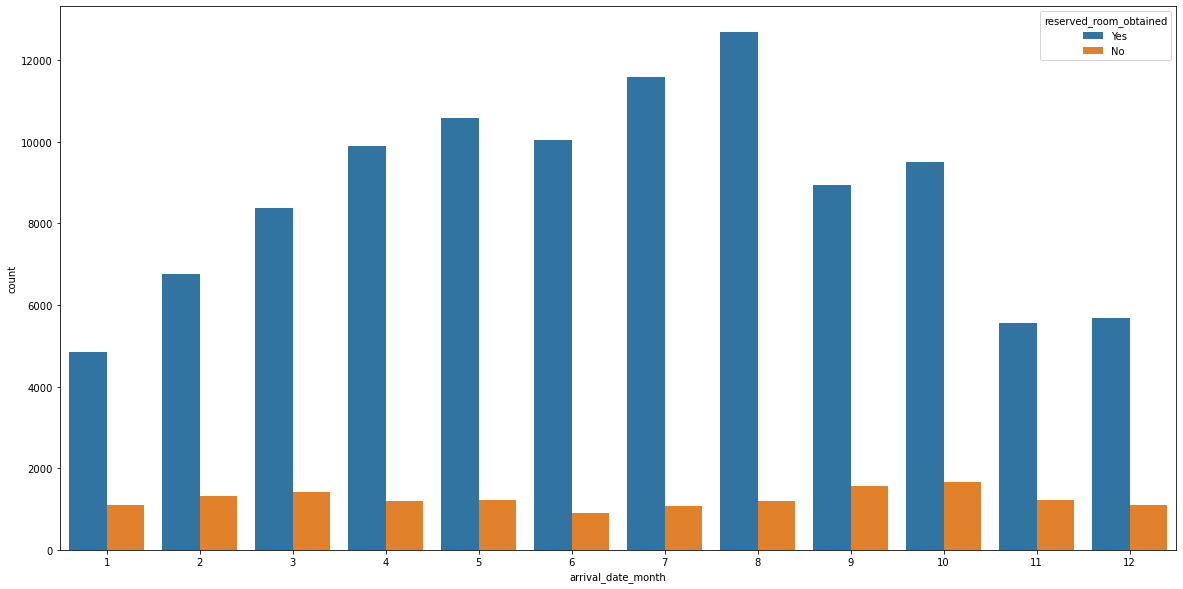

In [160]:
import numpy as np

clean_data['reserved_room_obtained'] = np.where(clean_data['reserved_room_type'] == clean_data['assigned_room_type'], 'Yes','No')
month_map = {'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12,}

plt.figure(figsize=(20,10))
sns.countplot(x=clean_data['arrival_date_month'].map(month_map), hue=clean_data['reserved_room_obtained'])
plt.show()

# Classification Model Comparison

## Split data using train_test_split

In [161]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_std,Y, test_size = 0.2)

## LogisticRegression()

In [162]:
from sklearn.linear_model import LogisticRegression

lgr = LogisticRegression(solver='lbfgs', max_iter=1000)
lgr.fit(X_train, Y_train)
lgr_acc = lgr.score(X_test, Y_test) * 100
print("The Logistic Regression accuracy score is: ", lgr_acc)

The Logistic Regression accuracy score is:  80.10000000000001


## KNeighborsClassifier()

In [163]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)
knn_acc = knn.score(X_test, Y_test) * 100
print("The KNN accuracy score is: ", knn_acc)

The KNN accuracy score is:  76.4


## GaussianNB()

In [164]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, Y_train)
nb_acc = nb.score(X_test, Y_test) * 100
print("The Naive Bayes accuracy score is: ", nb_acc)

The Naive Bayes accuracy score is:  22.6


## SVC()

In [165]:
from sklearn import svm

svc = svm.SVC()
svc.fit(X_train, Y_train)
svc_acc = svc.score(X_test, Y_test) * 100
print("The SVM accuracy score is: ", svc_acc)

The SVM accuracy score is:  80.5


## DecisionTreeClassifier()

In [166]:
from sklearn import tree

dt = tree.DecisionTreeClassifier()
dt.fit(X_train, Y_train)
dt_acc = dt.score(X_test, Y_test) * 100
print("The Decision Tree accuracy score is: ", dt_acc)

The Decision Tree accuracy score is:  79.25


## GradientBoostingClassifier()

In [167]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train, Y_train)
gb_acc = gb.score(X_test, Y_test) * 100
print("The gradient boosting accuracy score is: ", gb_acc)

The gradient boosting accuracy score is:  83.95


## XGBClassifier()

In [168]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, Y_train)
xgb_acc = xgb.score(X_test, Y_test) * 100
print("The gradient boosting accuracy score is: ", xgb_acc)

The gradient boosting accuracy score is:  85.5


## RandomForestClassifier()

In [169]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, Y_train)
rf_acc = rf.score(X_test, Y_test) * 100
print("The random forest accuracy score is: ", rf_acc)

The random forest accuracy score is:  85.3


## Model Accuracy Comparison and Visualization

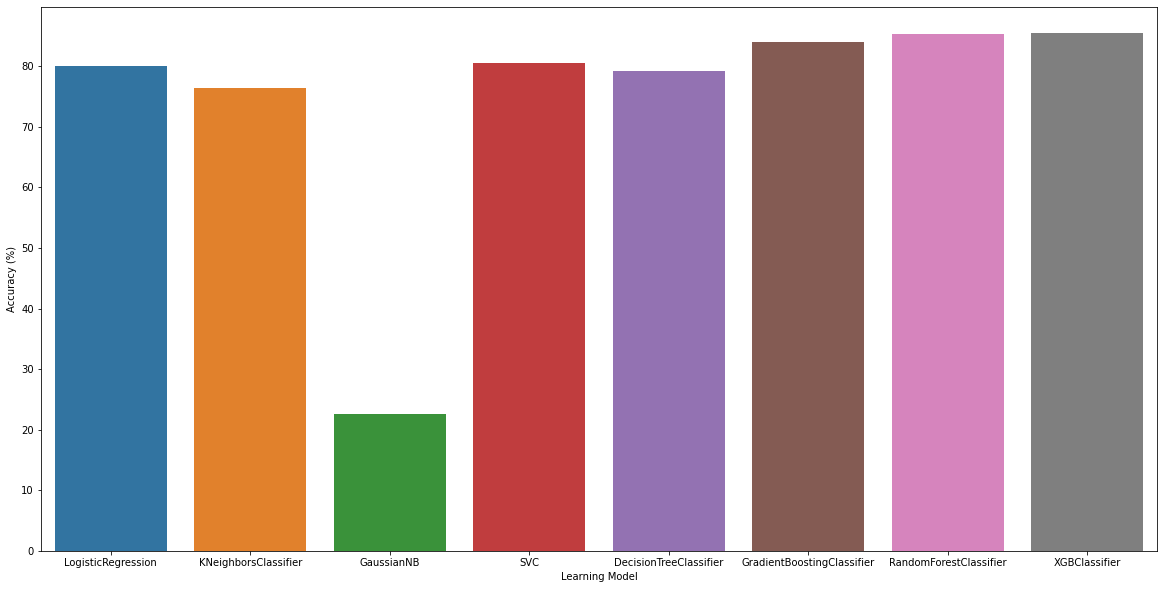

In [170]:
model_list = ['LogisticRegression', 'KNeighborsClassifier', 'GaussianNB', 'SVC', 'DecisionTreeClassifier', 'GradientBoostingClassifier', 'RandomForestClassifier', 'XGBClassifier']
model_acc = [lgr_acc, knn_acc, nb_acc, svc_acc, dt_acc, gb_acc, rf_acc, xgb_acc]
acc_comp = pd.Series(model_acc, index=model_list)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (20,10))
comp_barg = sns.barplot(x = acc_comp.index , y= acc_comp.values)
comp_barg.set(xlabel="Learning Model", ylabel="Accuracy (%)")
plt.show()

# Feature Selection Methods Comparison

## Selection using SelectKBest(chi2)

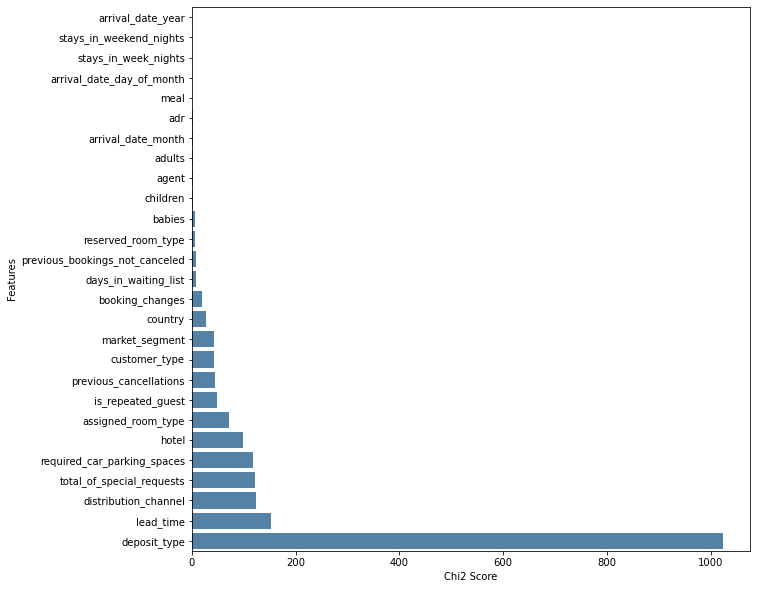

In [171]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

chi2_model = SelectKBest(score_func=chi2, k='all')

chi2_test = chi2_model.fit(X_mm, Y)

chi2_score = pd.Series(chi2_test.scores_, index=X.columns)
chi2_score = chi2_score.sort_values()

plt.figure(figsize=(10,10))

chi2_bar_plot = sns.barplot(x = chi2_score.values, y = chi2_score.index, color='steelblue')
chi2_bar_plot.set(xlabel="Chi2 Score", ylabel="Features")
plt.show()

In [172]:
feat_len = len(chi2_score)
chi2_df = pd.DataFrame()
while (feat_len >= 1):
    X_imp = data[chi2_score.nlargest(feat_len).index]
    
    SS = StandardScaler()
    X_imp_std = SS.fit_transform(X_imp)
    
    X_train, X_test, Y_train, Y_test = train_test_split(X_imp_std,Y, test_size = 0.2)
    
    rf = RandomForestClassifier()
    rf.fit(X_train, Y_train)
    
    rf_acc = rf.score(X_test, Y_test) * 100
    rf_ser = pd.Series({'Feature Length': feat_len, 'Accuracy': rf_acc})
    chi2_df = pd.concat([chi2_df, rf_ser.to_frame().T], ignore_index=True)
    
    feat_len = feat_len - 1

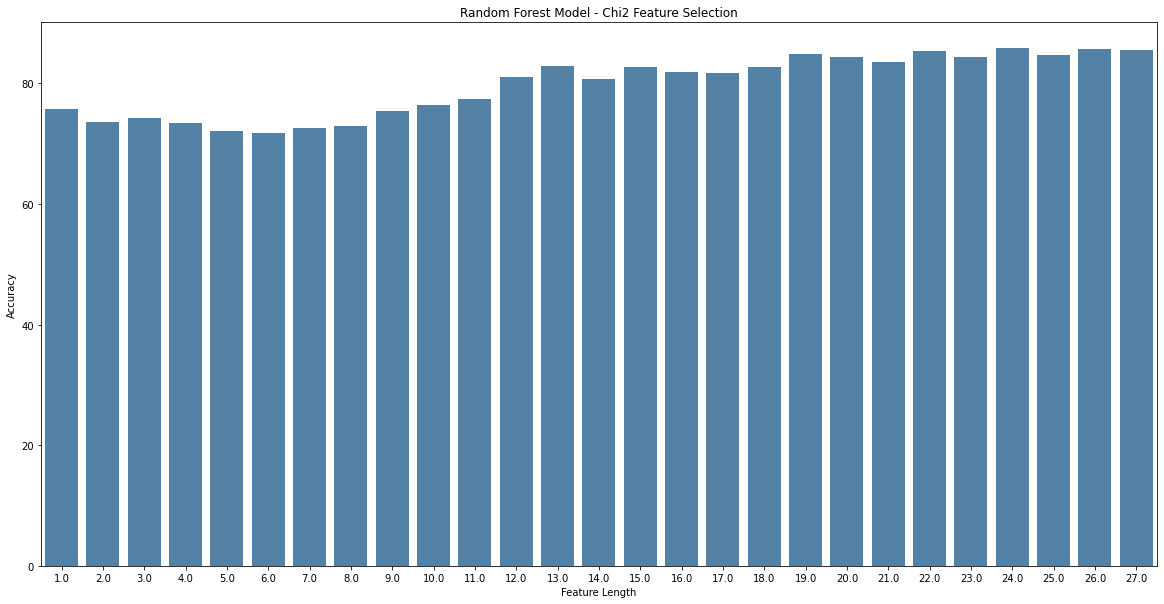

In [173]:
plt.figure(figsize=(20,10)) 
rf_plot = sns.barplot(x=chi2_df['Feature Length'], y=chi2_df['Accuracy'], color='steelblue')
rf_plot.set(title='Random Forest Model - Chi2 Feature Selection')
plt.show()

In [174]:
chi2_df_acc = pd.Series(chi2_df['Accuracy'].describe())
chi2_df_acc

count    27.000000
mean     79.748148
std       5.037236
min      71.700000
25%      74.775000
50%      81.800000
75%      84.375000
max      85.850000
Name: Accuracy, dtype: float64

## Selection Using ExtraTreesClassifier

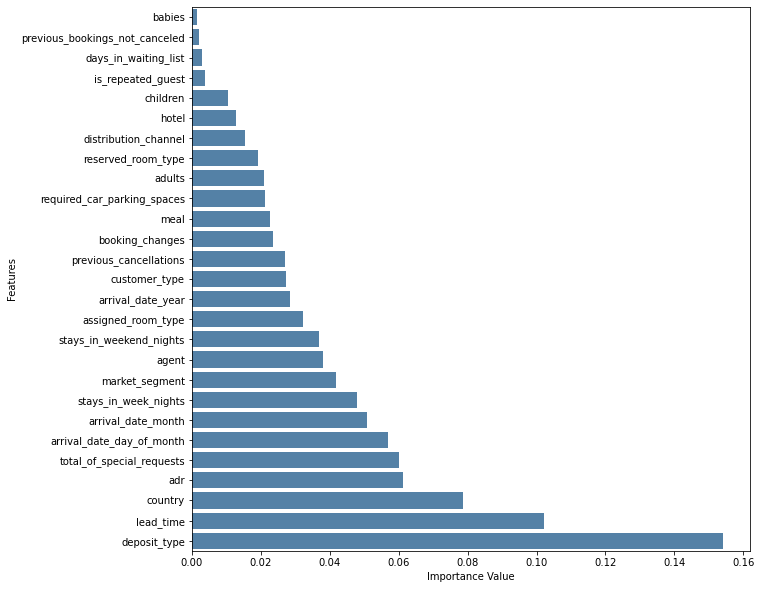

In [175]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X_std, Y)

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances = feat_importances.sort_values()
plt.figure(figsize=(10,10))
imp_bar_plot = sns.barplot(y = feat_importances.index, x = feat_importances.values, color='steelblue')
imp_bar_plot.set(xlabel="Importance Value", ylabel="Features")
plt.show()

In [176]:
feat_len = len(feat_importances)
ft_imp_df = pd.DataFrame()
while (feat_len >= 1):
    X_imp = data[feat_importances.nlargest(feat_len).index]
    
    SS = StandardScaler()
    X_imp_std = SS.fit_transform(X_imp)
    
    X_train, X_test, Y_train, Y_test = train_test_split(X_imp_std,Y, test_size = 0.2)
    
    rf = RandomForestClassifier()
    rf.fit(X_train, Y_train)
    
    rf_acc = rf.score(X_test, Y_test) * 100
    rf_ser = pd.Series({'Feature Length': feat_len, 'Accuracy': rf_acc})
    ft_imp_df = pd.concat([ft_imp_df, rf_ser.to_frame().T], ignore_index=True)
    
    feat_len = feat_len - 1

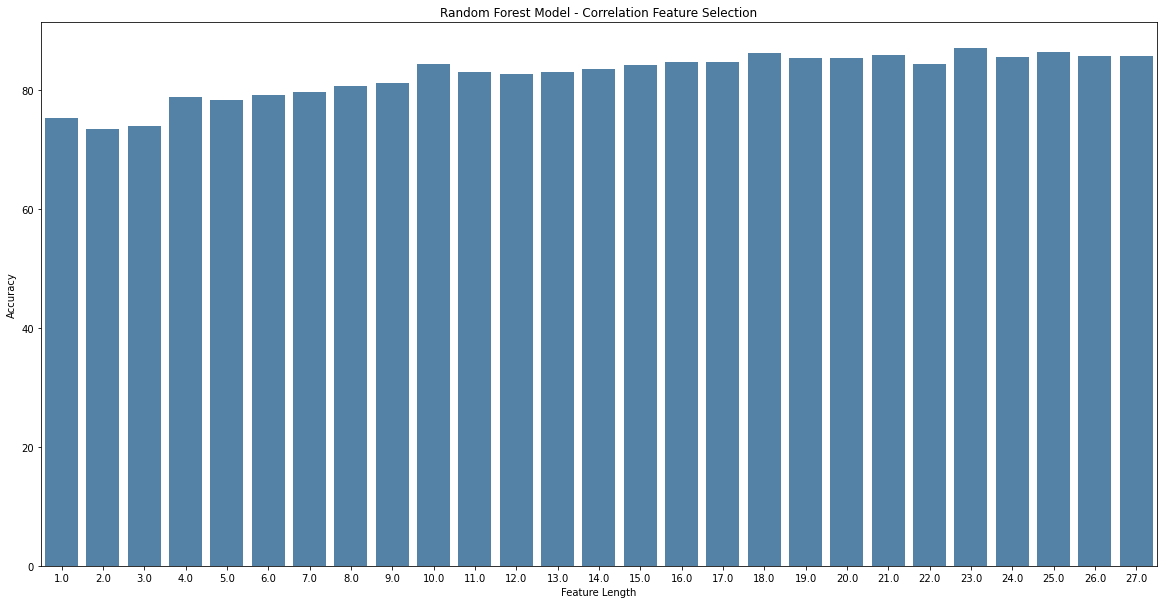

In [177]:
plt.figure(figsize=(20,10)) 
rf_plot = sns.barplot(x=ft_imp_df['Feature Length'], y=ft_imp_df['Accuracy'], color='steelblue')
rf_plot.set(title='Random Forest Model - Correlation Feature Selection')
plt.show()

In [178]:
ft_imp_df_acc = pd.Series(ft_imp_df['Accuracy'].describe())
ft_imp_df_acc

count    27.000000
mean     82.577778
std       3.880333
min      73.500000
25%      80.200000
50%      84.300000
75%      85.500000
max      87.100000
Name: Accuracy, dtype: float64

## Selection Using Correlation Value

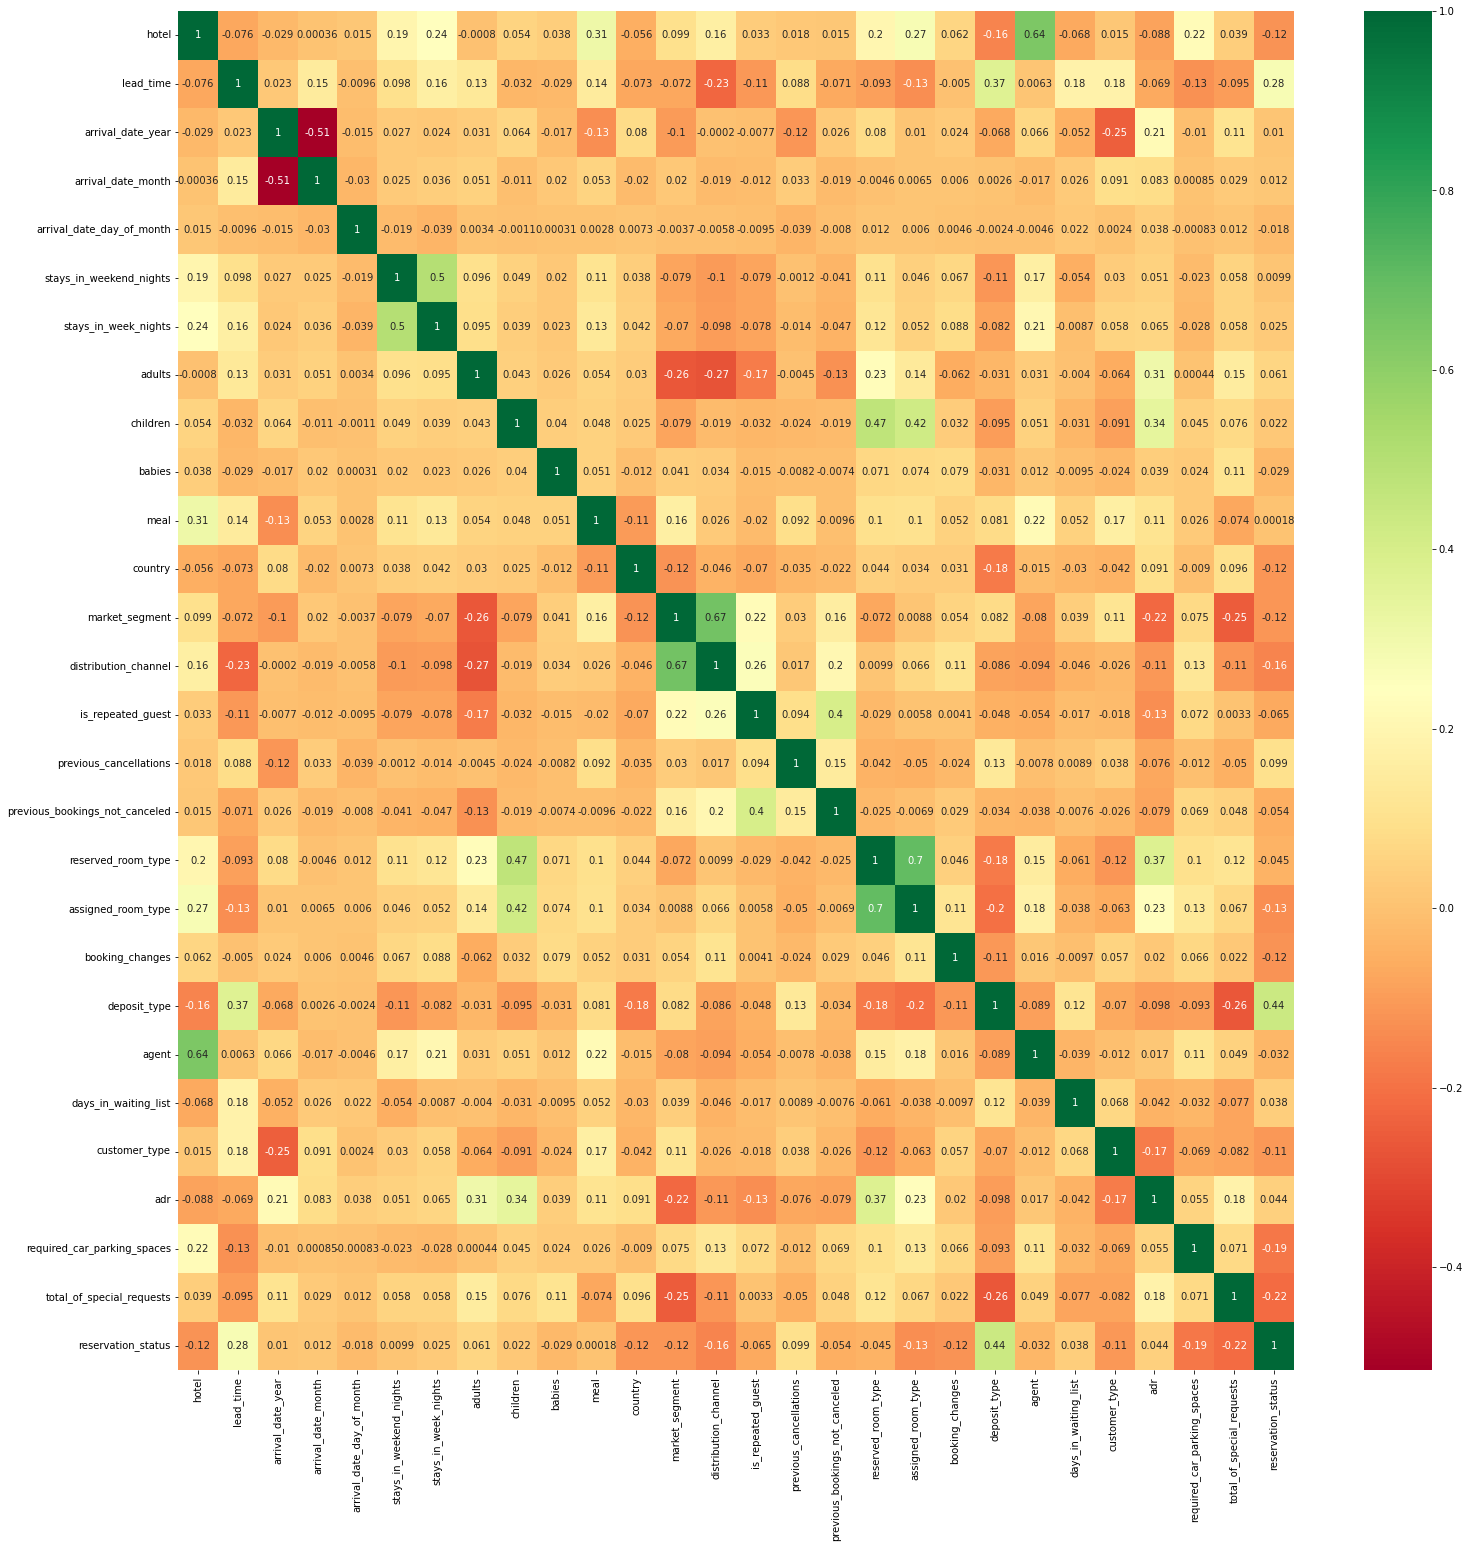

In [179]:
corr_mtx = data.corr()

plt.figure(figsize=(25,25))
hmap = sns.heatmap(corr_mtx, annot=True, cmap="RdYlGn")
plt.show()

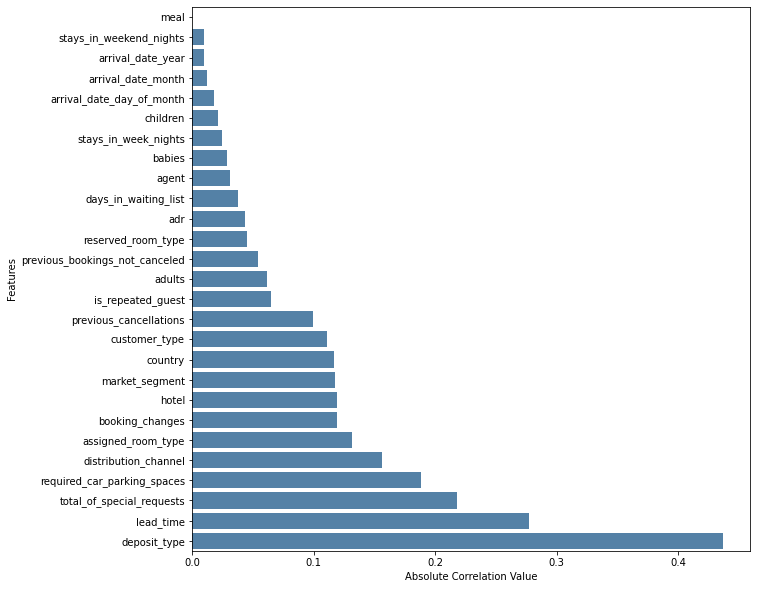

In [180]:
target_corr = corr_mtx['reservation_status'].drop(['reservation_status'], axis=0)
for val in range(len(target_corr)):
    target_corr[val] = abs(target_corr[val])
plt.figure(figsize=(10,10))
target_corr = target_corr.sort_values()
corr_bar_plot = sns.barplot(y = target_corr.index, x = target_corr.values, color='steelblue')
corr_bar_plot.set(xlabel="Absolute Correlation Value", ylabel="Features")
plt.show()

In [181]:
feat_len = len(target_corr)
corr_df = pd.DataFrame()

while (feat_len >= 1):
    X_imp = data[target_corr.nlargest(feat_len).index]
    
    SS = StandardScaler()
    X_imp_std = SS.fit_transform(X_imp)
    
    X_train, X_test, Y_train, Y_test = train_test_split(X_imp_std,Y, test_size = 0.2)
    
    rf = RandomForestClassifier()
    rf.fit(X_train, Y_train)
    
    rf_acc = rf.score(X_test, Y_test) * 100
    rf_ser = pd.Series({'Feature Length': feat_len, 'Accuracy': rf_acc})
    corr_df = pd.concat([corr_df, rf_ser.to_frame().T], ignore_index=True)
    
    feat_len = feat_len - 1

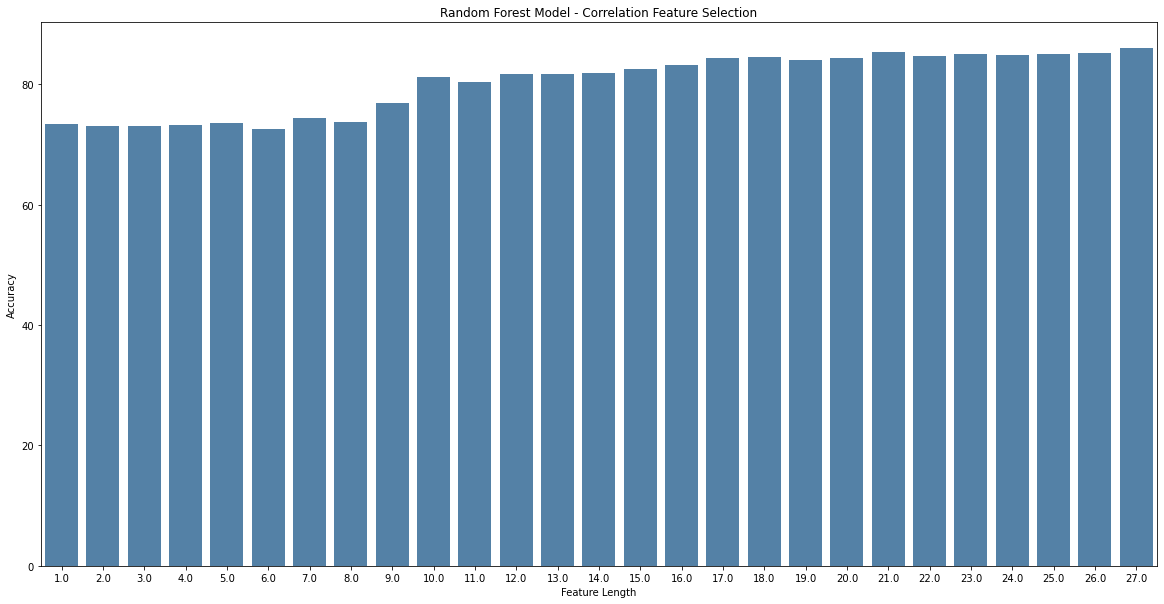

In [182]:
plt.figure(figsize=(20,10))
rf_plot = sns.barplot(x=corr_df['Feature Length'], y=corr_df['Accuracy'], color='steelblue')
rf_plot.set(title='Random Forest Model - Correlation Feature Selection')
plt.show()

In [183]:
corr_df_acc = pd.Series(corr_df['Accuracy'].describe())
corr_df_acc

count    27.000000
mean     80.361111
std       4.988667
min      72.500000
25%      74.075000
50%      81.800000
75%      84.600000
max      86.000000
Name: Accuracy, dtype: float64

## Accuracy Comparison and Visualization

In [184]:
acc_comp_df = pd.DataFrame()
acc_comp_df = pd.concat([chi2_df_acc.to_frame().T, ft_imp_df_acc.to_frame().T, corr_df_acc.to_frame().T])
acc_comp_df.index = ['Chi2 Score', 'Feature Importance', 'Correlation Score']
acc_comp_df

,count,mean,std,min,25%,50%,75%,max
Chi2 Score,27.0,79.748148,5.037236,71.7,74.775,81.8,84.375,85.85
Feature Importance,27.0,82.577778,3.880333,73.5,80.200,84.3,85.500,87.10
Correlation Score,27.0,80.361111,4.988667,72.5,74.075,81.8,84.600,86.00


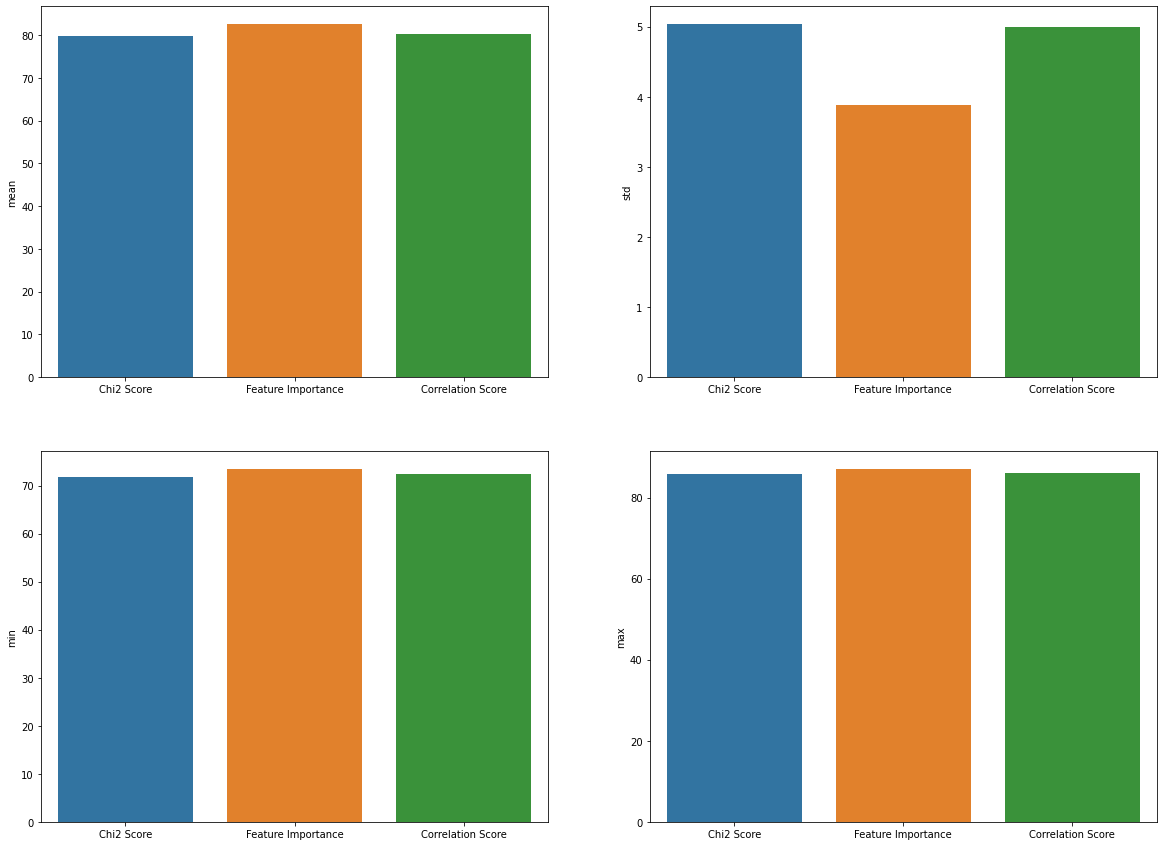

In [185]:
fig, axes = plt.subplots(2, 2, figsize=(20, 15))
sns.barplot(ax=axes[0, 0], x=acc_comp_df.index, y=acc_comp_df['mean'])
sns.barplot(ax=axes[0, 1], x=acc_comp_df.index, y=acc_comp_df['std'])
sns.barplot(ax=axes[1, 0], x=acc_comp_df.index, y=acc_comp_df['min'])
sns.barplot(ax=axes[1, 1], x=acc_comp_df.index, y=acc_comp_df['max'])
plt.show()